## **Линейная регрессия**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
mvid = pd.read_csv('/content/MVID_101001_171001.txt', parse_dates= ['<DATE>'])
sber = pd.read_csv('/content/SBER_101001_171001.txt', parse_dates= ['<DATE>'])
#Импортируем данные  

In [72]:
sber.head(-5)
#Кратко рассмотрим данные сбера

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,2010-10-01,0,89.09,332429890
1,SBER,D,2010-10-04,0,89.88,194032721
2,SBER,D,2010-10-05,0,91.97,198775753
3,SBER,D,2010-10-06,0,91.20,210406027
4,SBER,D,2010-10-07,0,90.40,145137617
...,...,...,...,...,...,...
1748,SBER,D,2017-09-19,0,184.85,41361960
1749,SBER,D,2017-09-20,0,186.47,49971400
1750,SBER,D,2017-09-21,0,187.38,41568220
1751,SBER,D,2017-09-22,0,187.55,37263860


In [ ]:
mvid.head(-5)

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248
...,...,...,...,...,...,...
1748,MVID,D,20170919,0,426.00,78860
1749,MVID,D,20170920,0,424.00,79110
1750,MVID,D,20170921,0,428.50,80030
1751,MVID,D,20170922,0,429.20,80120


In [ ]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()
#Слипаем данные акций двух компаний

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [ ]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']
#Присваиваем данные акций двух акций чтобы найти закономерность и обучить модель

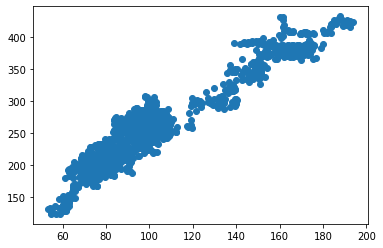

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()
#Визуализируем чтобы посмотреть есть какая то закономерность в наших данных
#Видно можно строить линейную регрессию

In [ ]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    # def BGD(self, X, Y):  
    #     alpha = 0.00005
    #     dJ0 = sum(self.predict(X) - Y) /len(X)
    #     dJ1 = sum((self.predict(X) - Y) * X) /len(X)
    #     self.b0 -= alpha * dJ0
    #     self.b1 -= alpha * dJ1
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step < max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)
#Здесь видим что, ошибка очень большая

0
0
initial error: 36271.58344889084


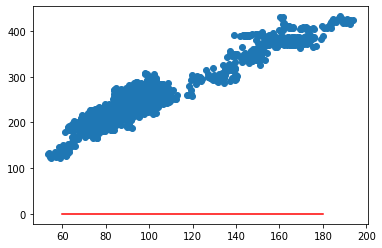

In [ ]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()
#Наша модель пока вообще неадекватно себя ведет

error after gradient descent: 298.76881676471504


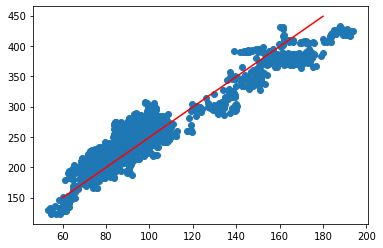

In [ ]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()
#После запуска метода градиентного спуска, видим что уже наша модель адекватно описывает наши эмпирических данных

In [ ]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
#Средняя ошибка модели

error after gradient descent: 298.76881676471504


### **Логистическая регрессия**

In [1]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima = pima[1:]

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
Y = pima.label
X = pima.drop(['label'], axis=1)


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)
#распиливаем наши данные на train и test данные

In [5]:
x_train

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
664,9,145,80,46,130,37.9,0.637,40
713,10,129,62,36,0,41.2,0.441,38
162,7,102,74,40,105,37.2,0.204,45
510,8,120,78,0,0,25,0.409,64
306,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
646,2,157,74,35,440,39.4,0.134,30
716,7,187,50,33,392,33.9,0.826,34
73,13,126,90,0,0,43.4,0.583,42
236,4,171,72,0,0,43.6,0.479,26


In [6]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
#создаем логистическую регрессию

In [7]:
cls.fit(x_train,y_train)
#обучаем нашу модель

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
y_pred = cls.predict(x_test)
#вставляем наши тестируемые данные

In [9]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

In [ ]:
#Здесь видим что, TruePositive кол-во (Верно угаданных больных) больше всего

Text(0.5, 15.0, 'Предсказанные значения')

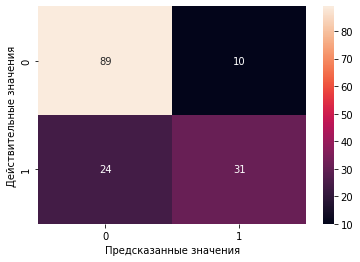

In [10]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Метрика достоверности предсказания:

In [11]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

Метрика точности

In [12]:
metrics.precision_score(y_test, y_pred,average='micro')

0.7792207792207793

Метрика полноты

In [13]:
metrics.recall_score(y_test, y_pred,average='macro')

0.7313131313131314

In [ ]:
pima = pima['label'].astype('int32')

### **Визуализация**

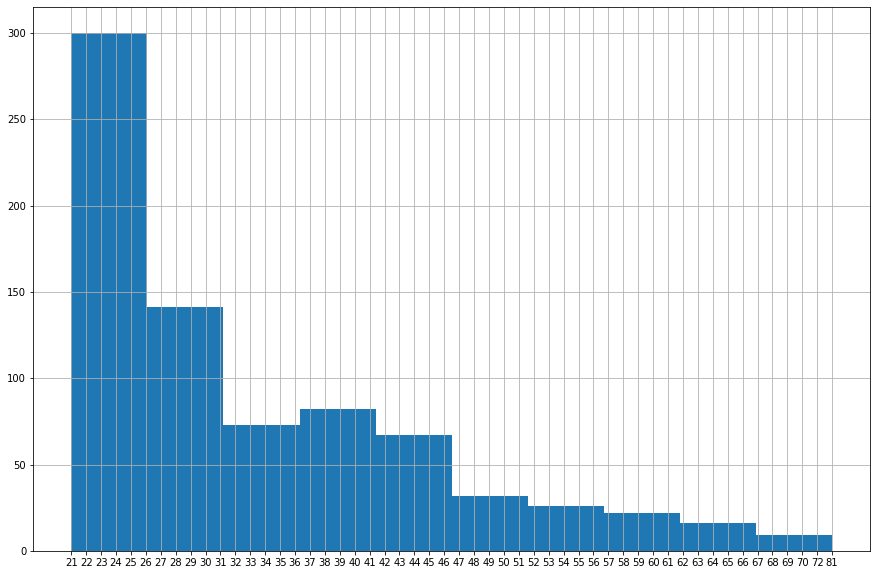

In [90]:
fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.hist(sorted(pima.age,))
ax.grid()

In [ ]:
#Гистограмма наших пациентов по возрасту

In [159]:
# pima.groupby(['pregnant']).mean()

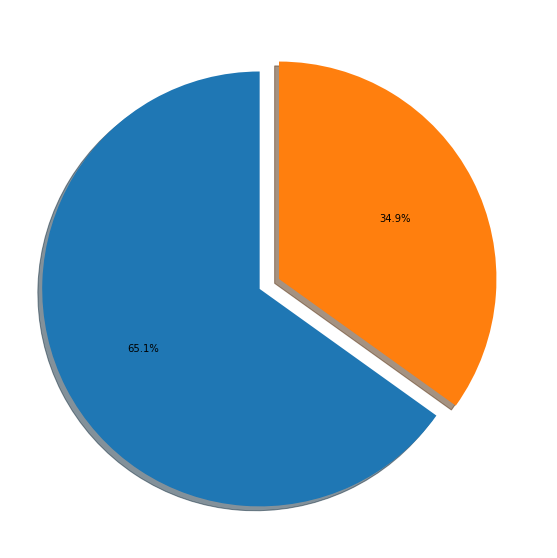

In [117]:
fig, ax = plt.subplots(1,1, figsize = (15,10))
#ax.hist(sorted(pima.age,))
ax.pie(pima.label.value_counts(),shadow=True,autopct='%2.1f%%' , startangle=90, explode = [0.1,0])
ax.set_label('das')
#Кол-во больных (1) и здоровых (0)

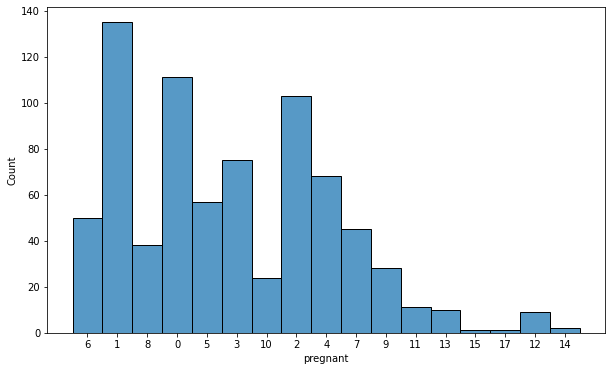

In [125]:
plt.figure(figsize= (10,6))
sns.histplot(data = (pima.pregnant))
#Гистограмма беременных и их количества

### **Тестирование гипотез**

Посмотрим на средние значения по возрасту, больных и здоровых пациентов. Нулевая гипотеза говорит о том что, их возраст не равно, а альтернативная равно

In [144]:
pima.label = pima.label.astype('int') 
pima.age = pima.age.astype('int') 

In [145]:
healthy = pima[pima.label == 0]
sicky = pima[pima.label == 1]

In [150]:
import scipy.stats
T_test = scipy.stats.ttest_ind(healthy.age, sicky.age, equal_var=False)

In [151]:
T_test

Ttest_indResult(statistic=-6.92073837898804, pvalue=1.2015125273113395e-11)

In [155]:
# P-value меньше чем alpha = 0.05, соответсвенно отрицаем нулевую гитопезу

In [156]:
healthy.age.mean()

31.19

In [157]:
sicky.age.mean()

37.06716417910448

In [158]:
#Действительно можно посмотреть что их средний возрасть отличается